In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

In [3]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

In [7]:
df = pd.read_csv(
    url,
    names=columns,
    na_values='?',
    sep='\s+'
)

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Bhakti\AppData\Local\Temp\ipykernel_9412\1291497120.py:5: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+'


In [8]:
print(df.shape)

(398, 9)


In [9]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [10]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [11]:
df.dropna(subset=['horsepower'], inplace=True)

In [12]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [14]:
df.shape

(392, 9)

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [16]:
df.drop('car_name', axis=1, inplace=True)

In [17]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [18]:
df['origin'] = df['origin'].map({1:'USA', 2:'Europe', 3:'Japan'})

In [19]:
df= pd.get_dummies(df, columns=['origin'], drop_first=True)

In [20]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_Japan,origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,True


In [21]:
df.head(50)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_Japan,origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,True
5,15.0,8,429.0,198.0,4341.0,10.0,70,False,True
6,14.0,8,454.0,220.0,4354.0,9.0,70,False,True
7,14.0,8,440.0,215.0,4312.0,8.5,70,False,True
8,14.0,8,455.0,225.0,4425.0,10.0,70,False,True
9,15.0,8,390.0,190.0,3850.0,8.5,70,False,True


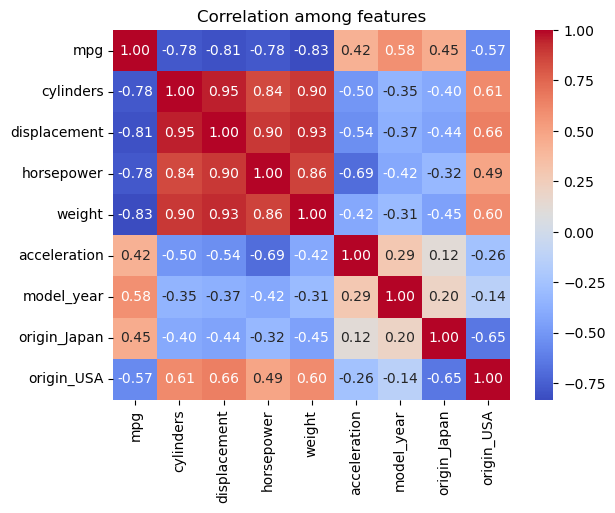

In [22]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap = 'coolwarm')
plt.title('Correlation among features')
plt.show()

In [23]:
x = df.drop('mpg', axis=1)
y=df['mpg']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [25]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(x_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)

In [28]:
r2 = r2_score(y_test, y_pred)

In [29]:
print(f"mae: {mae:.2f}")
print(f"r2: {r2:.2f}")

mae: 2.46
r2: 0.79


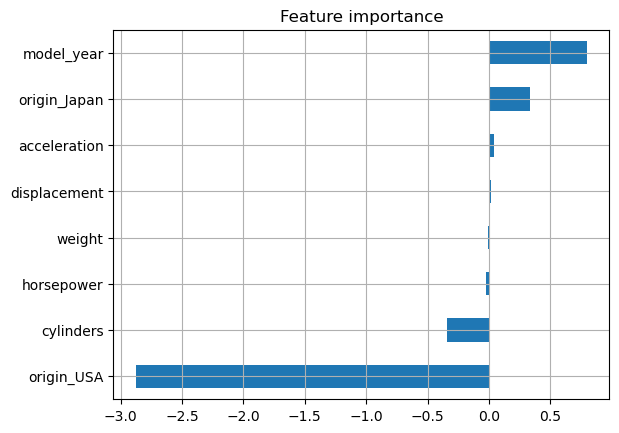

In [30]:
imp = pd.Series(model.coef_, index=x.columns)
imp.sort_values().plot(kind='barh', title='Feature importance')
plt.grid(True)
plt.show()

In [31]:
sample = np.array=([[4, 150, 90, 2800, 15.0, 81, 0, 1]])

In [32]:
mpg_pred = model.predict(sample)

C:\Users\Bhakti\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
print(f"predicted mpg: {mpg_pred[0]:.2f}")

predicted mpg: 27.45
